In [1]:
# !pip install pandas-datareader

In [2]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
start = datetime.datetime(2017,1,1) 
end = datetime.datetime(2022,1,1) 
tesla = web.DataReader('TSLA', 'yahoo',start,end)
ford = web.DataReader('F', 'yahoo',start,end)
gm = web.DataReader('GM', 'yahoo',start,end)

In [4]:
# tesla.to_csv('Tesla_Stock.csv')
# ford.to_csv('Ford_Stock.csv')
# gm.to_csv('GeneralMotors_Stock.csv')

In [5]:
tesla.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,372.333344,356.906677,357.890015,364.646667,71145900.0,364.646667
2021-12-28,373.000000,359.473328,369.829987,362.823334,60324000.0,362.823334
2021-12-29,368.000000,354.713318,366.213318,362.063324,56154000.0,362.063324
2021-12-30,365.183319,351.049988,353.776672,356.779999,47040900.0,356.779999
2021-12-31,360.666656,351.529999,357.813324,352.260010,40733700.0,352.260010


Text(0.5, 1.0, 'Stock prices of Tesla, GM and Ford')

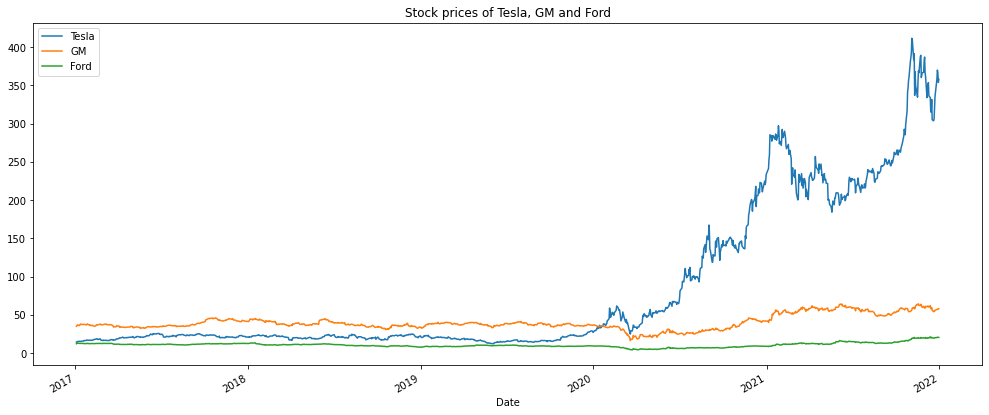

In [6]:
tesla['Open'].plot(label = 'Tesla', figsize=(17,7))
gm['Open'].plot(label = 'GM')
ford['Open'].plot(label = 'Ford')
plt.legend();
plt.title('Stock prices of Tesla, GM and Ford')

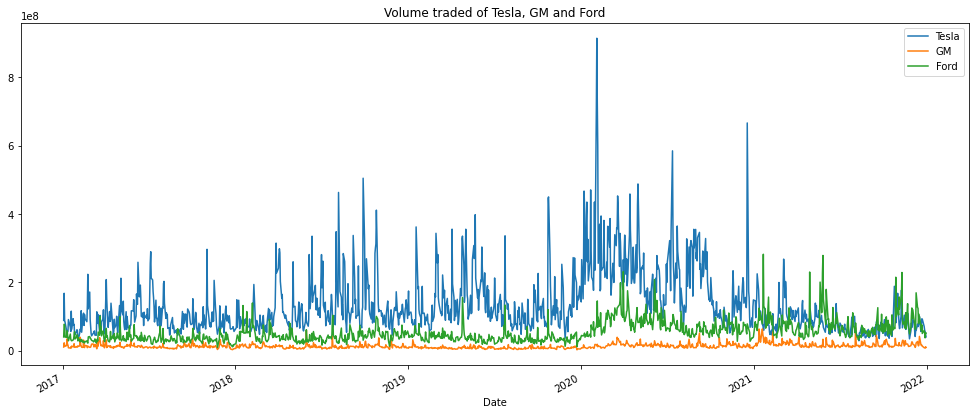

In [7]:
tesla['Volume'].plot(label = 'Tesla', figsize=(17,7))
gm['Volume'].plot(label = 'GM')
ford['Volume'].plot(label = 'Ford')
plt.legend();
plt.title('Volume traded of Tesla, GM and Ford');

In [8]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']

In [9]:
tesla.head(5)

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2017-01-03,14.688667,14.064000,14.324000,14.466000,88849500.0,14.466000,1.272680e+09
2017-01-04,15.200000,14.287333,14.316667,15.132667,168202500.0,15.132667,2.408099e+09
2017-01-05,15.165333,14.796667,15.094667,15.116667,88675500.0,15.116667,1.338527e+09
2017-01-06,15.354000,15.030000,15.128667,15.267333,82918500.0,15.267333,1.254446e+09
2017-01-09,15.461333,15.200000,15.264667,15.418667,59692500.0,15.418667,9.111861e+08


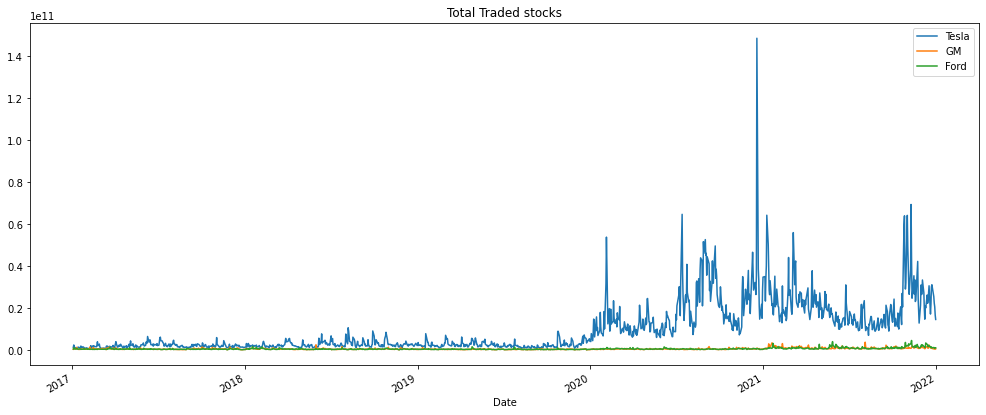

In [10]:
tesla['Total Traded'].plot(label = 'Tesla', figsize=(17,7))
gm['Total Traded'].plot(label = 'GM')
ford['Total Traded'].plot(label = 'Ford')
plt.legend();
plt.title('Total Traded stocks');

In [11]:
tesla['Total Traded'].argmax()

998

In [12]:
tesla.iloc[[tesla['Total Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-12-18,231.666672,209.513336,222.96666,231.666672,666378600.0,231.666672,1.485802e+11


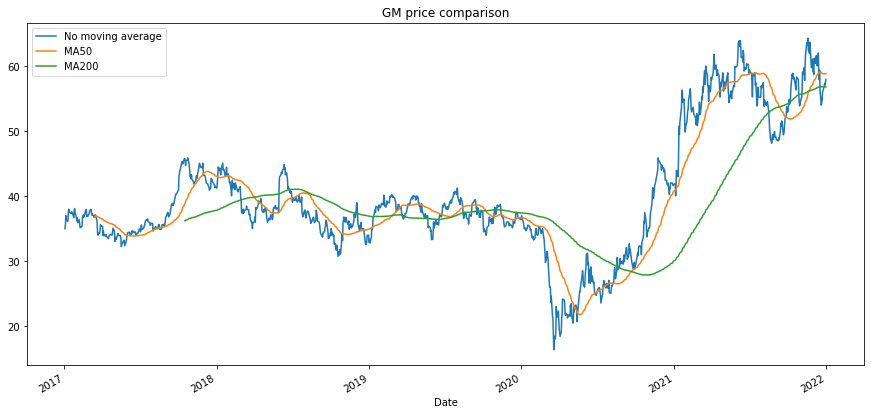

In [13]:
gm.Open.plot(label='No moving average',figsize=(15,7));
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA50'].plot(label='MA50')
gm['MA200'] = gm['Open'].rolling(200).mean()
gm['MA200'].plot(label='MA200')
plt.legend();
plt.title('GM price comparison');

In [14]:
from pandas.plotting import scatter_matrix

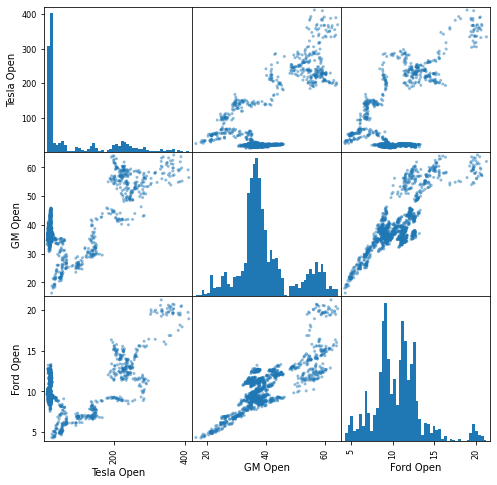

In [15]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']], axis=1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open']
scatter_matrix(car_comp,figsize=(8,8),hist_kwds={'bins':50});

In [16]:
# !pip install mpl-finance

C:\Users\SergeiM\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


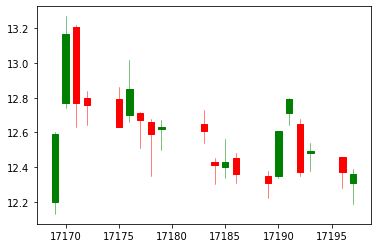

In [17]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

ford_reset = ford.loc['2017-01':'2017-01'].reset_index()
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]
                             
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig,ax = plt.subplots()
candlestick_ohlc(ax, ford_values, width=0.6, colorup='g', colordown='r');

## Daily percentage Change

In [18]:
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1))-1
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2017-01-03,14.688667,14.064000,14.324000,14.466000,88849500.0,14.466000,1.272680e+09,NaN
2017-01-04,15.200000,14.287333,14.316667,15.132667,168202500.0,15.132667,2.408099e+09,0.046085
2017-01-05,15.165333,14.796667,15.094667,15.116667,88675500.0,15.116667,1.338527e+09,-0.001057
2017-01-06,15.354000,15.030000,15.128667,15.267333,82918500.0,15.267333,1.254446e+09,0.009967
2017-01-09,15.461333,15.200000,15.264667,15.418667,59692500.0,15.418667,9.111861e+08,0.009912


In [19]:
gm['returns'] = (gm['Close']/gm['Close'].shift(1))-1
ford['returns'] = (ford['Close']/ford['Close'].shift(1))-1

<AxesSubplot:>

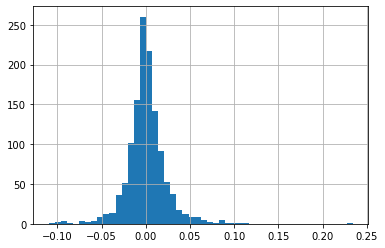

In [20]:
ford['returns'].hist(bins=50)

<AxesSubplot:>

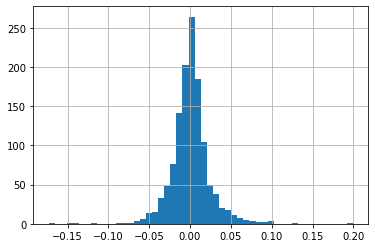

In [21]:
gm['returns'].hist(bins=50)

<AxesSubplot:>

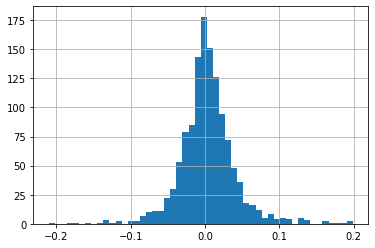

In [22]:
tesla['returns'].hist(bins=50)

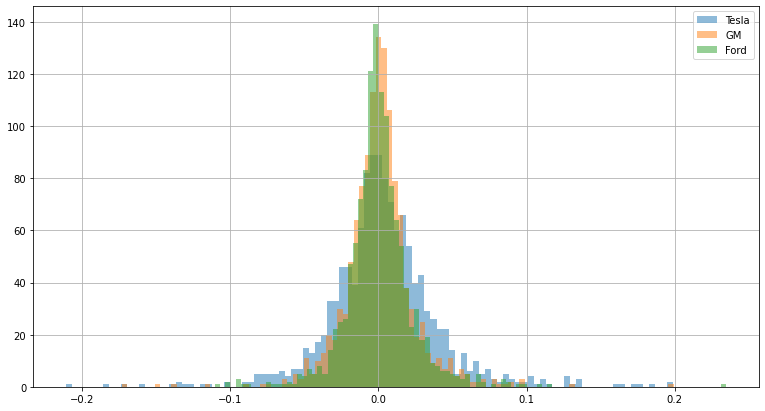

In [23]:
tesla['returns'].hist(bins=100, label='Tesla', alpha=0.5, figsize=(13,7))
gm['returns'].hist(bins=100, label='GM', alpha=0.5)
ford['returns'].hist(bins=100, label='Ford', alpha=0.5)
plt.legend()

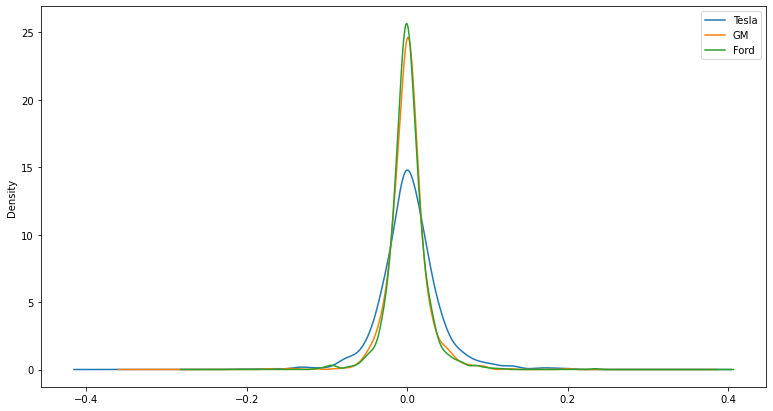

In [24]:
tesla['returns'].plot(kind='kde', label='Tesla', figsize=(13,7))
gm['returns'].plot(kind='kde', label='GM')
ford['returns'].plot(kind='kde', label='Ford')
plt.legend()

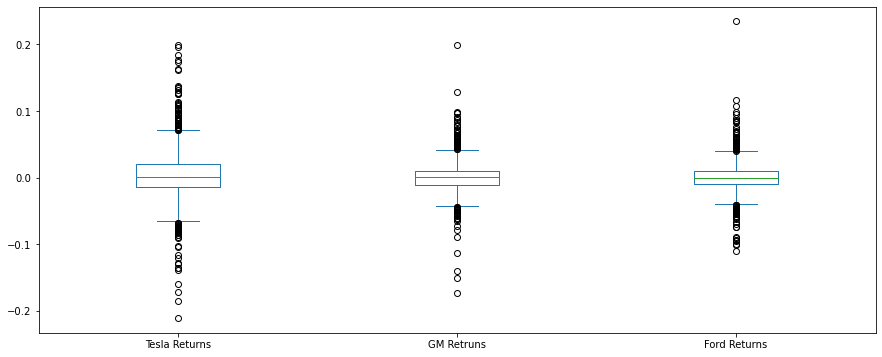

In [25]:
#look for how volotile stick prcies are
box_df = pd.concat([tesla['returns'], gm['returns'], ford['returns']], axis=1)
box_df.columns = ['Tesla Returns', 'GM Retruns', 'Ford Returns']
box_df.plot(kind='box',figsize=(15,6));

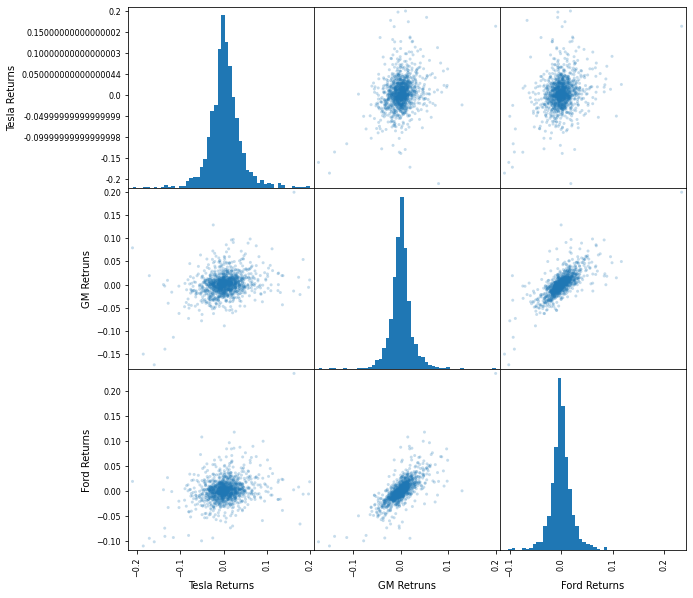

In [26]:
scatter_matrix(box_df,figsize=(10,10),hist_kwds={'bins':50}, alpha=0.25);

## Cumulative Returns

In [27]:
tesla['Cumulative Return'] = (1+ tesla['returns']).cumprod() 
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2017-01-03,14.688667,14.064000,14.324000,14.466000,88849500.0,14.466000,1.272680e+09,NaN,NaN
2017-01-04,15.200000,14.287333,14.316667,15.132667,168202500.0,15.132667,2.408099e+09,0.046085,1.046085
2017-01-05,15.165333,14.796667,15.094667,15.116667,88675500.0,15.116667,1.338527e+09,-0.001057,1.044979
2017-01-06,15.354000,15.030000,15.128667,15.267333,82918500.0,15.267333,1.254446e+09,0.009967,1.055394
2017-01-09,15.461333,15.200000,15.264667,15.418667,59692500.0,15.418667,9.111861e+08,0.009912,1.065856


In [28]:
gm['Cumulative Return'] = (1+ gm['returns']).cumprod() 
ford['Cumulative Return'] = (1+ ford['returns']).cumprod() 

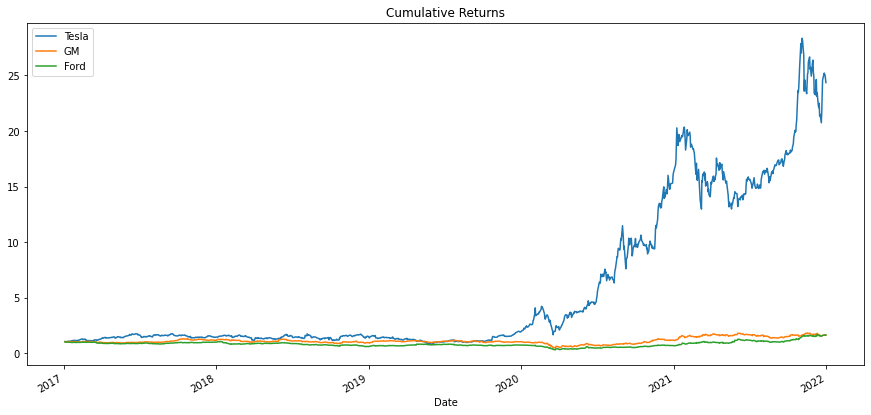

In [29]:
tesla['Cumulative Return'].plot(label='Tesla', figsize=(15,7))
gm['Cumulative Return'].plot(label='GM')
ford['Cumulative Return'].plot(label='Ford');
plt.title('Cumulative Returns')
plt.legend()